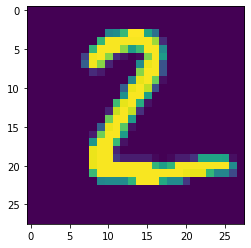

In [32]:
from keras.datasets import mnist 
import matplotlib.pyplot as plt 
from keras.optimizers import Adam 
from keras import utils 
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import load_model 

dataset = mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data() #translate the data to image 

img = x_test[1]
plt.imshow(img)
x_test = x_test.reshape(x_test.shape[0], -1).astype("float64")

#normalization 
x_test /= 255

x_test = x_test.reshape(-1, 28, 28, 1)

lenet5 = load_model('Model/lenet5_mnist.h5')#load lenet5 model trained with mnist dataset 
lenet5.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy']) 



Sampled 600 images inside beta
600 images inside beta have the same label, local robustness formula satisfied


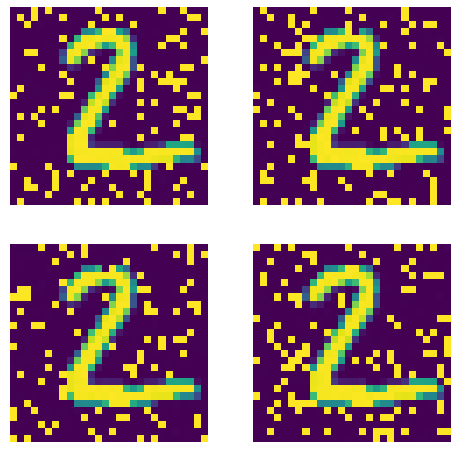

0.112

In [47]:
beta = 0.112
sample(x_test[1],y_test[1],beta)

In [45]:
def sample(x_test,y_test,beta):
    
    max_distance = 0  #max safe distance
    count = 0
    count2 = 0
    neighbour_list=[]
    mean = np.zeros(2)  
    cov = np.eye(2)
    label = y_test
    
    while True:
        count2+=1
        p = np.random.multivariate_normal(mean, cov,(28,28)) #sample formula
        p = p.reshape(-1,28,28,1) 
        neighbour = p[0] + x_test*255
        neighbour /= 255
        distance=np.linalg.norm(p[0]) 
        distance /= 255
        #print(distance)
        if (distance < beta or distance == beta):
            #print(distance)
            output = lenet5.predict(neighbour.reshape(-1, 28, 28, 1),batch_size=128)[0]
            proba = softmax(output)
            pred = np.argmax(proba)
            neighbour = (neighbour*255).astype(np.uint8).reshape(28,28)
            if(pred == label): 
                neighbour_list.append((proba[label],neighbour))
                count+=1  #correct prediction
            else:  #if there are some iamges inside beta cannot have the same label, beta will be decreased
                beta = beta-0.001
                neighbour_list.append((proba[label],neighbour))
                print("Beta is reduced by 0.001, the new beta is",beta)   
            
        if(count==600):  
            print("Sampled %s images inside beta" % count)
            print("600 images inside beta have the same label, local robustness formula satisfied")
            break
        
    neighbour_list.sort(key = lambda x : x[0],reverse = True) #sort the probability of each prediction
    #print(neighbour_list[0][1].shape)
    
    #show some positive examples
    figure = plt.figure(figsize = (8,8))
    plt.axis("off")
    for i in range(4):
        figure.add_subplot(2,2,i+1)
        plt.imshow(neighbour_list[i][1].reshape(28,28))
        plt.axis("off")
    plt.show()  

    return beta

In [46]:
def softmax(x):
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum()

In [27]:
mean = np.zeros(2)  
cov = np.eye(2)
p = np.random.multivariate_normal(mean, cov,(28,28))
print(p.shape)

(28, 28, 2)
